# Fit BAO peak from input correlation function

In [2]:
import os
import tempfile
import time
import copy

import numpy as np
import scipy

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 14})

from pycorr import TwoPointCorrelationFunction, TwoPointEstimator, NaturalTwoPointEstimator, project_to_multipoles, project_to_wp, utils, setup_logging
from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog
from cosmoprimo import *

from pk_model import *

# To activate logging
setup_logging()

## Data directory

In [3]:
data_dir = '/feynman/work/dphp/mp270220/outputs/'
output_dir = '/feynman/work/dphp/mp270220/outputs/'

## Load correlation function data

In [5]:
catalog_names = ['AbacusSummit_highbase_c000_ph100_z1.175',
                 'AbacusSummit_base_c000_ph000_z1.175',
                 'AbacusSummit_base_c000_ph000_z0.800']

sim_z = [1.175, 1.175, 0.800]
sim_boxsizes = [1000., 2000., 2000.]

# Simulation to use
sim_index = 1

boxsize = sim_boxsizes[sim_index]
z = sim_z[sim_index]
catalog_name = catalog_names[sim_index]

corrfunc_data_name_woRSD = catalog_name+'_corrfunc_randomx6'
corrfunc_data_name_wRSD = catalog_name+'_wRSD'+'_corrfunc_randomx6'

result_woRSD = TwoPointCorrelationFunction.load(data_dir+corrfunc_data_name_woRSD+'.npy')
result_wRSD = TwoPointCorrelationFunction.load(data_dir+corrfunc_data_name_wRSD+'.npy')

[000010.95]  04-21 17:46  TwoPointEstimator            INFO     Loading /feynman/work/dphp/mp270220/outputs/AbacusSummit_base_c000_ph000_z1.175_corrfunc_randomx6.npy.
[000012.74]  04-21 17:46  numexpr.utils                INFO     Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[000012.74]  04-21 17:46  numexpr.utils                INFO     Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[000012.74]  04-21 17:46  numexpr.utils                INFO     NumExpr defaulting to 8 threads.
[000013.68]  04-21 17:46  TwoPointEstimator            INFO     Loading /feynman/work/dphp/mp270220/outputs/AbacusSummit_base_c000_ph000_z1.175_wRSD_corrfunc_randomx6.npy.


### Global parameters

In [6]:
# Abacus summit base cosmology
cosmo_abacus = fiducial.AbacusSummitBase()
bg = cosmo_abacus.get_background()

f = bg.Omega_m(z)**0.55

# Multipoles (monopole, quadruple, hexadecapole)
ells = [0, 2]
nells = len(ells)

ells_string = 'poles'+''.join([str(ell) for ell in ells])

### Load correlation function poles

In [8]:
s, xiell1, cov1 = result_woRSD.get_corr(ells=ells, return_sep=True, return_cov=True)
std1 = np.array_split(np.diag(cov1)**0.5, nells)

xiell2, cov2 = result_wRSD.get_corr(ells=ells, return_sep=False, return_cov=True)
std2 = np.array_split(np.diag(cov2)**0.5, nells)

## Plot multipoles

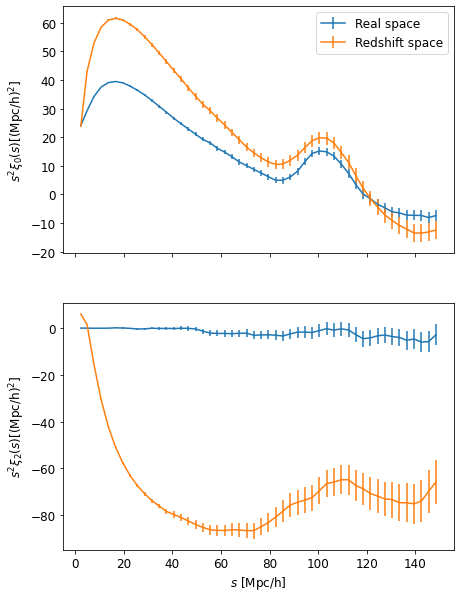

In [24]:
plt.rcParams["figure.figsize"] = (7, 10)

fig, axes = plt.subplots(nells, 1, sharex=True)

for ill,ell in enumerate(ells):
    axes[ill].errorbar(s, s**2 * xiell1[ill], s**2 * std1[ill], fmt='-', label='Real space')
    axes[ill].errorbar(s, s**2 * xiell2[ill], s**2 * std2[ill], fmt='-', label='Redshift space')
    axes[ill].set_ylabel(r'$s^2 \xi_{}(s)$'.format(ell) + '[$(\mathrm{Mpc}/$h$)^{2}$]')

axes[1].set_xlabel(r'$s$ [Mpc/h]')
axes[0].legend()
plt.show()